# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

Форма для сдачи будет опубликована позднее.

### Пожалуйста, не производите никаких манипуляций с  переменной `_dict_for_submission` и с ячейками, в которых она используется. На ее основе будет сгенерирован итоговый файл для сдачи задания.

In [1]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission = dict()


def transform_list(list_of_ints):
    return [str(x) for x in list_of_ints]
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 1. Небольшой numpy-разогрев. (10%)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Создайте матрицу A размерами 10 на 10 из упорядоченных целых чисел от 0 до 100
# hint: np.random.randint

A = np.arange(100).reshape(10,10)


In [4]:
# Посчитайте средние значения в матрице по столбцам

A_1 = np.mean(A, axis = 0)

A_1

array([45., 46., 47., 48., 49., 50., 51., 52., 53., 54.])

In [5]:
# Транспонируйте матрицу A
A_T = A.T

A_T

array([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       [ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
       [ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
       [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
       [ 4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
       [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
       [ 6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
       [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
       [ 8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
       [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]])

In [6]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

M = A*A_T

M

array([[   0,   10,   40,   90,  160,  250,  360,  490,  640,  810],
       [  10,  121,  252,  403,  574,  765,  976, 1207, 1458, 1729],
       [  40,  252,  484,  736, 1008, 1300, 1612, 1944, 2296, 2668],
       [  90,  403,  736, 1089, 1462, 1855, 2268, 2701, 3154, 3627],
       [ 160,  574, 1008, 1462, 1936, 2430, 2944, 3478, 4032, 4606],
       [ 250,  765, 1300, 1855, 2430, 3025, 3640, 4275, 4930, 5605],
       [ 360,  976, 1612, 2268, 2944, 3640, 4356, 5092, 5848, 6624],
       [ 490, 1207, 1944, 2701, 3478, 4275, 5092, 5929, 6786, 7663],
       [ 640, 1458, 2296, 3154, 4032, 4930, 5848, 6786, 7744, 8722],
       [ 810, 1729, 2668, 3627, 4606, 5605, 6624, 7663, 8722, 9801]])

In [7]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

B = np.dot(A, A)
B

array([[ 2850,  2895,  2940,  2985,  3030,  3075,  3120,  3165,  3210,
         3255],
       [ 7350,  7495,  7640,  7785,  7930,  8075,  8220,  8365,  8510,
         8655],
       [11850, 12095, 12340, 12585, 12830, 13075, 13320, 13565, 13810,
        14055],
       [16350, 16695, 17040, 17385, 17730, 18075, 18420, 18765, 19110,
        19455],
       [20850, 21295, 21740, 22185, 22630, 23075, 23520, 23965, 24410,
        24855],
       [25350, 25895, 26440, 26985, 27530, 28075, 28620, 29165, 29710,
        30255],
       [29850, 30495, 31140, 31785, 32430, 33075, 33720, 34365, 35010,
        35655],
       [34350, 35095, 35840, 36585, 37330, 38075, 38820, 39565, 40310,
        41055],
       [38850, 39695, 40540, 41385, 42230, 43075, 43920, 44765, 45610,
        46455],
       [43350, 44295, 45240, 46185, 47130, 48075, 49020, 49965, 50910,
        51855]])

#### Не меняйте следующую ячейку. Просто запустите ее.

In [8]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['B'] = transform_list(list(B.flatten()))
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [9]:
import pandas as pd

In [10]:
all_data = pd.read_csv('forest_dataset.csv')

Выделим 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей (до конца ноутбука она более не используется), в `all_data` поместим оставшиеся 80%. Не будем перемешивать данные сознательно (для удобства проверки).

In [11]:
delayed_data = all_data[int(0.8 * len(all_data)):]
all_data = all_data[:int(0.8 * len(all_data))]

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [12]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [13]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [14]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

two_class_labels

array([2, 1, 2, ..., 2, 2, 1], dtype=int64)

In [15]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, two_class_labels, test_size = 0.25)
test_labels

array([1, 1, 1, ..., 2, 2, 1], dtype=int64)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [16]:
lr_clf = LogisticRegression(max_iter = 100000, solver = 'lbfgs')

In [17]:
lr_clf.fit(train_feature_matrix, train_labels)

prediction = lr_clf.predict(test_feature_matrix)

f_1 = f1_score(prediction, test_labels)
print('F1 score (sklearn) = '+str(f_1))

F1 score (sklearn) = 0.7252162341982701


In [18]:
#F1 score:
cor = 0
all_sel = 0
all_rel = 0
for i in range(len(prediction)):
    if prediction[i] == 1:
        if prediction[i] == test_labels[i]:           
            cor += 1.
            all_sel += 1.
        else:
            all_sel += 1.
    if test_labels[i] == 1:
        all_rel += 1.
        
p = cor/all_sel
r = cor/all_rel
print('Precision = '+str(p))
print('Recall = '+str(r))

f_1 = 2*p*r/(p+r)
print('F1 score = '+str(f_1))

Precision = 0.7486263736263736
Recall = 0.7032258064516129
F1 score = 0.7252162341982701


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [21]:
from sklearn import preprocessing
train_feature_matrix_multi, test_feature_matrix_multi, train_labels_multi, test_labels_multi = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)


In [58]:
max_abs_scaler = preprocessing.MaxAbsScaler()
train_feature_matrix_multi = max_abs_scaler.fit_transform(train_feature_matrix_multi)
test_feature_matrix_multi = max_abs_scaler.fit_transform(test_feature_matrix_multi)

In [27]:
lr_clf_multi = LogisticRegression(multi_class = 'multinomial', solver = 'saga', max_iter = 10000, tol=1e-4)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

parametrs = {'C':np.linspace(0.01, 1, 10), 'penalty':['l1', 'l2']}

In [29]:
search = GridSearchCV(lr_clf_multi, parametrs, cv = 5, scoring = 'accuracy', n_jobs=-1)
search.fit(train_feature_matrix_multi, train_labels_multi)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [30]:
search.best_estimator_

LogisticRegression(C=0.56, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [31]:
C = np.linspace(0.01, 1, 10)
L_1 = []
L_2 = []

for x in C:
    lr = LogisticRegression(multi_class = 'multinomial', solver = 'saga', max_iter = 10000, penalty = 'l1', C = x)
    lr.fit(train_feature_matrix_multi, train_labels_multi)
    L_1.append(lr.score(test_feature_matrix_multi, test_labels_multi))
 
for x in C:
    lr = LogisticRegression(multi_class = 'multinomial', solver = 'saga', max_iter = 10000, penalty = 'l2', C = x)
    lr.fit(train_feature_matrix_multi, train_labels_multi)
    L_2.append(lr.score(test_feature_matrix_multi, test_labels_multi))

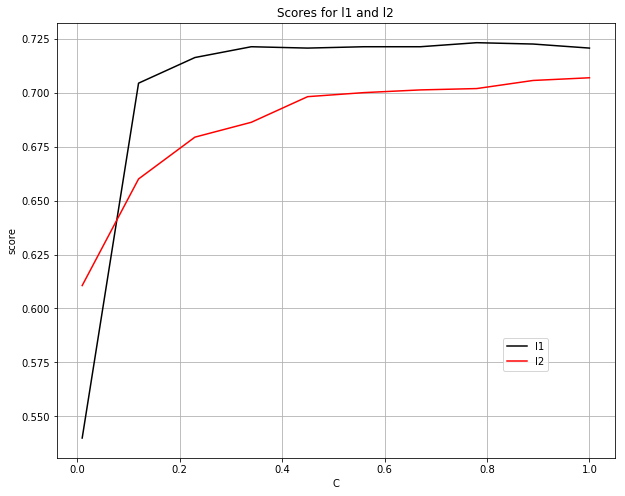

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(C, L_1, color = 'black', label = 'l1')
ax.plot(C, L_2, color = 'red', label = 'l2')
ax.set(xlabel='C', ylabel='score',
       title='Scores for l1 and l2')
ax.grid()
ax.legend(loc=(0.8, 0.2))

plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

#### Анализируя графики, приходим к выводу, что за лучшие параметры можно взять: C = от 0.4 до 1.0 и penalty = L1

Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [33]:
best_lr_clf = LogisticRegression(multi_class = 'multinomial', solver = 'saga', max_iter = 10000, penalty = 'l1', C = 0.8)
best_lr_clf.fit(train_feature_matrix_multi, train_labels_multi)
probability = best_lr_clf.predict_proba(test_feature_matrix_multi)

In [ ]:
best_lr_clf.score(test_feature_matrix_multi, )

In [51]:
mean_prob = np.mean(probability, axis = 0)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [52]:
probabilities = []
for i in range(1,8):
    res = 0
    for j in test_labels_multi:
        if j == i:
            res += 1
    probabilities.append(res/len(test_labels_multi))           

In [53]:
print('Results:' + str(mean_prob))
print('Real frequencies:' + str(probabilities))

Results:[0.3739752  0.49019579 0.06074965 0.00555804 0.01410098 0.02426231
 0.03115803]
Real frequencies:[0.378125, 0.478125, 0.06625, 0.004375, 0.01375, 0.03, 0.029375]


#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

#kn = KNeighborsClassifier()

In [46]:
train_feature_matrix_knn, test_feature_matrix_knn, train_labels_knn, test_labels_knn = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [47]:
neigh = np.linspace(1, 10, 10)
uni = []
dist = []

for x in neigh:
    kn = KNeighborsClassifier(weights = 'uniform', n_neighbors = int(x))
    kn.fit(train_feature_matrix_knn, train_labels_knn)
    uni.append(kn.score(test_feature_matrix_knn, test_labels_knn))
 
for x in neigh:
    kn = KNeighborsClassifier(weights = 'distance', n_neighbors = int(x))
    kn.fit(train_feature_matrix_knn, train_labels_knn)
    dist.append(kn.score(test_feature_matrix_knn, test_labels_knn))


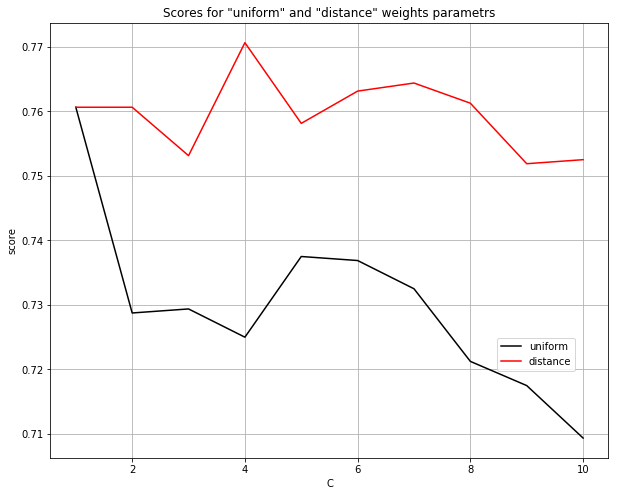

In [62]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(neigh, uni, color = 'black', label = 'uniform')
ax.plot(neigh, dist, color = 'red', label = 'distance')
ax.set(xlabel='C', ylabel='score',
       title='Scores for "uniform" and "distance" weights parametrs')
ax.grid()
ax.legend(loc=(0.8, 0.2))

plt.show()

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

#### Оптимальное число соседей = 4, weights-parametr = 'distance

Создайте объект `best_knn_clf`, который представляет собой лучший классификатор.

In [50]:
# Hint: для этого достаточно указать стратегию вычисления весов и число соседей в конструкторе

best_knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
best_knn_clf.fit(train_feature_matrix_knn, train_labels_knn)
prob = best_knn_clf.predict_proba(test_feature_matrix_knn)
print('Results:' + str(np.mean(prob, axis = 0)))
print('Real frequencies:' + str(probabilities))

Results:[0.36206721 0.50328133 0.06621644 0.0045978  0.01402671 0.02662627
 0.02318424]
Real frequencies:[0.378125, 0.478125, 0.06625, 0.004375, 0.01375, 0.03, 0.029375]


#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии `best_lr_clf` и лучшего kNN `best_knn_clf` на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [60]:
#max_abs_scaler
delayed_features_scaled = max_abs_scaler.fit_transform(delayed_feature_matrix)

print("Linear regression's results:" + str(best_lr_clf.score(delayed_features_scaled, delayed_labels)))
print("KNeighbor's results:" + str(best_knn_clf.score(delayed_feature_matrix, delayed_labels)))

Linear regression's results:0.719
KNeighbor's results:0.7585


#### Не меняйте следующую ячейку. Запустите ее для генерации `submission` файла.

In [61]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['best_lr_clf_delayed'] = transform_list(list(best_lr_clf.predict(delayed_feature_matrix)))
_dict_for_submission['best_knn_clf_delayed'] = transform_list(list(best_knn_clf.predict(delayed_feature_matrix)))

import json
with open('submission_hw1_basic.json', 'w') as iofile:
    json.dump(_dict_for_submission, iofile)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Данный файл необходимо будет прикрепить к Google-форме для сдачи домашнего задания. __Для идентификации используется e-mail, который вы указали при регистрации на курс. Проверка производится автоматически. Если вы подпишитесь другим e-mail'ом, задание просто не будет засчитано.__

На этом задание завершено. Мы будем рады, если вы оставите обратную связь по данному заданию [по ссылке](https://forms.gle/2qaf14ky3J6HZfe48). Она анонимна ;)